<a href="https://colab.research.google.com/github/ShowkatImam/try/blob/main/Preprocessing_and_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive1')

Mounted at /content/drive1


In [ ]:
df = pd.read_csv('/content/drive1/MyDrive/suicide_watch_try12.csv',encoding= 'unicode_escape')
df.head()

,Post,Ideation
0,might fuck around and kill myself,1
1,Life is the procrastination of death and I am ...,1
2,Every night I contemplate suicide and every ti...,1
3,I hate that Im living for other people,1
4,I hate my circumstances. I really don't see ho...,1


In [ ]:
df['Post']=df['Post'].apply(str)


In [ ]:
df.head(n=20)

,Post,Ideation
0,might fuck around and kill myself,1
1,Life is the procrastination of death and I am ...,1
2,Every night I contemplate suicide and every ti...,1
3,I hate that Im living for other people,1
4,I hate my circumstances. I really don't see ho...,1
5,yesterday i tried to kill myself with a knife ...,1
6,"I need to kill myself. This summer, June 29. I...",1
7,I'm a junkie who watched the love of my life c...,1
8,never failed harder in school than this year. ...,1
9,"I will die alone. Hurt this, I dont really car...",1


In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r' ', text)
    text = text.lower()
    return text
    
  


In [ ]:
df['Post'] = df['Post'].apply(cleanText)
df["Post"] = df['Post'].apply(cleanText)
df.head(n=20)


,Post,Ideation
0,might fuck around and kill myself,1
1,life is the procrastination of death and i am ...,1
2,every night i contemplate suicide and every ti...,1
3,i hate that im living for other people,1
4,i hate my circumstances. i really don't see ho...,1
5,yesterday i tried to kill myself with a knife ...,1
6,"i need to kill myself. this summer, june 29. i...",1
7,i'm a junkie who watched the love of my life c...,1
8,never failed harder in school than this year. ...,1
9,"i will die alone. hurt this, i dont really car...",1


In [ ]:
import string
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

In [ ]:
df['Post'] = df['Post'].apply(remove_punctuation)
df.head(10)

,Post,Ideation
0,might fuck around and kill myself,1
1,life is the procrastination of death and i am ...,1
2,every night i contemplate suicide and every ti...,1
3,i hate that im living for other people,1
4,i hate my circumstances i really dont see how ...,1
5,yesterday i tried to kill myself with a knife ...,1
6,i need to kill myself this summer june 29 i ha...,1
7,im a junkie who watched the love of my life co...,1
8,never failed harder in school than this year p...,1
9,i will die alone hurt this i dont really care ...,1


In [ ]:
Suicaldal = df[df.Ideation == 1]
print(Suicaldal.shape)


(1538, 2)


In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
all_suicidal = Suicaldal['Post'].str.split(' ')
all_suicidal.head()

0             [might, fuck, around, and, kill, myself]
1    [life, is, the, procrastination, of, death, an...
2    [every, night, i, contemplate, suicide, and, e...
3     [i, hate, that, im, living, for, other, people]
4    [i, hate, my, circumstances, i, really, dont, ...
Name: Post, dtype: object

In [ ]:
all_spam_cleaned = []

for text in all_suicidal:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)
#final_text_spam[:50000000000000000000000]

In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r' ', text)
    text = text.lower()
    return text

In [ ]:
final_text_spam

'might fuck around and kill myself life is the procrastination of death and i am planning on taking action every night i contemplate suicide and every time i think about how my parents would feel i don\x92t want them to be sad or guilty but there\x92s no way i can kill myself without that happening recently i\x92ve been slowly caring less about how they would feel idk i feel like i\x92m living on a timer that\x92s very close to ending soon i just don\x92t know when i hate that i\x92m living for other people i hate my circumstances i really dont see how im to continue i havent caught a break in a decade one tragedy to the next this world is unbelievably harsh i feel crazy like im living in the age of dinosaurs trying not to get eaten yesterday i tried to kill myself with a knife but i was saved and now im in a mental hospital and my mom hates me and my girlfriend is going to leave me i think so why am i here i dont know so im just going to suffocate myself i need to kill myself this sum

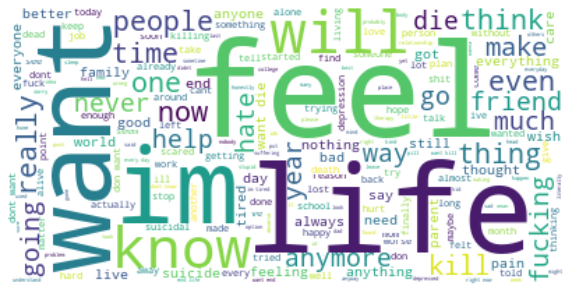

In [ ]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()




In [ ]:
wordcloud_spam = WordCloud(background_color="white").generate(Suicaldal)

# Lines 2 - 5
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: ignored

In [ ]:
import string 
import nltk 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', Suicaldal['Post'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

KeyError: ignored

In [ ]:
corpus

['made suicid note close end',
 'want die hate way look much',
 'get dedic life help suicid peopl',
 'feel like cut one talk',
 'girl love see smile love',
 'love need feel complet',
 'would fix elect system']